In [29]:


from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import IPython.display
import PIL.Image
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
import math
import tensorflow_datasets as tfds
import os

In [36]:
p = None
labels = None
gen = load_model("modelSaves/" + datasetName + "/" + generatorName +"/fold_0")
for i in range(math.floor(nEntries/inceptionBatchSize)):
    resizedImgs = []
    for img in testImgs[inceptionBatchSize*i : min(inceptionBatchSize*(i+1), nEntries)]:
        retyped = ((img * 127.5) + 127.5).astype('uint8')
        resized = cv2.resize(retyped, dsize=(enlargedWidth, enlargedHeight), interpolation=cv2.INTER_CUBIC)
        del retyped
        reshaped = np.expand_dims(resized, axis=-1)
        del resized
        untyped = (reshaped.astype('float') - 127.5)/127.5
        del reshaped
        resizedImgs.append(untyped)
        del untyped
        
    genimgs = None
    labelInput = None
    if(generatorName == 'cgen'):
        labelInput = np.random.randint(0,nClasses, size = (inceptionBatchSize))
        labelInputOH = np.array([[1 if i == li else 0 for i in range(nClasses)] for li in labelInput], dtype='float')
        noiseInput = np.random.uniform(-1,1,size=(inceptionBatchSize,noiseDim))
        genimgs = gen.predict([noiseInput, labelInputOH], verbose=0)
        del labelInputOH
        del noiseInput 
        labelInput += 10
    else:
        noiseInput = np.random.uniform(-1,1,size=(inceptionBatchSize,noiseDim))
        genimgs, labelInputOH = gen.predict(noiseInput, verbose=0)
        labelInput = [np.argmax(lbl) + 10 for lbl in labelInputOH]

    for img in genimgs:
        retyped = ((img * 127.5) + 127.5).astype('uint8')
        resized = cv2.resize(retyped, dsize=(enlargedWidth, enlargedHeight), interpolation=cv2.INTER_CUBIC)
        del retyped
        reshaped = np.expand_dims(resized, axis=-1)
        del resized
        untyped = (reshaped.astype('float') - 127.5)/127.5
        del reshaped
        resizedImgs.append(untyped)
        del untyped
    del genimgs

    resizedImgs = np.array(resizedImgs)
    resizedImgs = np.concatenate((resizedImgs,)*3, axis=-1)
    out = inceptionModel.predict(resizedImgs)
    del resizedImgs
    
    out = np.reshape(out,(out.shape[0], out.shape[-1]))
    if(i == 0):
        p = out
        labels = testLbls[inceptionBatchSize*i : min(inceptionBatchSize*(i+1), nEntries)]
        labels =  np.concatenate((labels, labelInput))
    else:
        p = np.concatenate((p, out))
        labels =  np.concatenate((labels, testLbls[inceptionBatchSize*i : min(inceptionBatchSize*(i+1), nEntries)]))
        labels =  np.concatenate((labels, labelInput))
    del out
    del labelInput
    IPython.display.clear_output(True)
    print("Batch " + str(i) + "/" + str(math.ceil(nEntries/inceptionBatchSize)))
del testImgs
del testLbls

Batch 55/56


In [37]:
'''p = None
labels = None
gen = load_model("modelSaves/" + datasetName + "/gen/fold_0")
for i in range(math.floor(nEntries/inceptionBatchSize)):
    resizedImgs = []
    for img in testImgs[inceptionBatchSize*i : min(inceptionBatchSize*(i+1), nEntries)]:
        retyped = ((img * 127.5) + 127.5).astype('uint8')
        resized = cv2.resize(retyped, dsize=(enlargedWidth, enlargedHeight), interpolation=cv2.INTER_CUBIC)
        del retyped
        reshaped = np.expand_dims(resized, axis=-1)
        del resized
        untyped = (reshaped.astype('float') - 127.5)/127.5
        del reshaped
        resizedImgs.append(untyped)
        del untyped
        
    noiseInput = np.random.uniform(-1,1,size=(inceptionBatchSize,noiseDim))
    genimgs, labelInputOH = gen.predict(noiseInput, verbose=0)
    labelInput = [np.argmax(lbl) + 10 for lbl in labelInputOH]
    
    del labelInputOH
    del noiseInput

    for img in genimgs:
        retyped = ((img * 127.5) + 127.5).astype('uint8')
        resized = cv2.resize(retyped, dsize=(enlargedWidth, enlargedHeight), interpolation=cv2.INTER_CUBIC)
        del retyped
        reshaped = np.expand_dims(resized, axis=-1)
        del resized
        untyped = (reshaped.astype('float') - 127.5)/127.5
        del reshaped
        resizedImgs.append(untyped)
        del untyped
    del genimgs

    resizedImgs = np.array(resizedImgs)
    resizedImgs = np.concatenate((resizedImgs,)*3, axis=-1)
    out = inceptionModel.predict(resizedImgs)
    del resizedImgs
    
    out = np.reshape(out,(out.shape[0], out.shape[-1]))
    if(i == 0):
        p = out
        labels = testLbls[inceptionBatchSize*i : min(inceptionBatchSize*(i+1), nEntries)]
        labels =  np.concatenate((labels, labelInput))
    else:
        p = np.concatenate((p, out))
        labels =  np.concatenate((labels, testLbls[inceptionBatchSize*i : min(inceptionBatchSize*(i+1), nEntries)]))
        labels =  np.concatenate((labels, labelInput))
    del out
    del labelInput
    IPython.display.clear_output(True)
    print("Batch " + str(i) + "/" + str(math.ceil(nEntries/inceptionBatchSize)))
del testImgs
del testLbls'''

'p = None\nlabels = None\ngen = load_model("modelSaves/" + datasetName + "/gen/fold_0")\nfor i in range(math.floor(nEntries/inceptionBatchSize)):\n    resizedImgs = []\n    for img in testImgs[inceptionBatchSize*i : min(inceptionBatchSize*(i+1), nEntries)]:\n        retyped = ((img * 127.5) + 127.5).astype(\'uint8\')\n        resized = cv2.resize(retyped, dsize=(enlargedWidth, enlargedHeight), interpolation=cv2.INTER_CUBIC)\n        del retyped\n        reshaped = np.expand_dims(resized, axis=-1)\n        del resized\n        untyped = (reshaped.astype(\'float\') - 127.5)/127.5\n        del reshaped\n        resizedImgs.append(untyped)\n        del untyped\n        \n    noiseInput = np.random.uniform(-1,1,size=(inceptionBatchSize,noiseDim))\n    genimgs, labelInputOH = gen.predict(noiseInput, verbose=0)\n    labelInput = [np.argmax(lbl) + 10 for lbl in labelInputOH]\n    \n    del labelInputOH\n    del noiseInput\n\n    for img in genimgs:\n        retyped = ((img * 127.5) + 127.5).as

In [38]:
tsne = TSNE(n_components=2, verbose=1, random_state=1602)
z = tsne.fit_transform(p)
del p

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28000 samples in 0.050s...


d:\Users\felip\anaconda3\envs\TCC_20220914\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Users\felip\anaconda3\envs\TCC_20220914\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 28000 samples in 46.702s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28000
[t-SNE] Computed conditional probabilities for sample 2000 / 28000
[t-SNE] Computed conditional probabilities for sample 3000 / 28000
[t-SNE] Computed conditional probabilities for sample 4000 / 28000
[t-SNE] Computed conditional probabilities for sample 5000 / 28000
[t-SNE] Computed conditional probabilities for sample 6000 / 28000
[t-SNE] Computed conditional probabilities for sample 7000 / 28000
[t-SNE] Computed conditional probabilities for sample 8000 / 28000
[t-SNE] Computed conditional probabilities for sample 9000 / 28000
[t-SNE] Computed conditional probabilities for sample 10000 / 28000
[t-SNE] Computed conditional probabilities for sample 11000 / 28000
[t-SNE] Computed conditional probabilities for sample 12000 / 28000
[t-SNE] Computed conditional probabilities for sample 13000 / 28000
[t-SNE] Computed conditional probabilities for sample 14000 / 2800

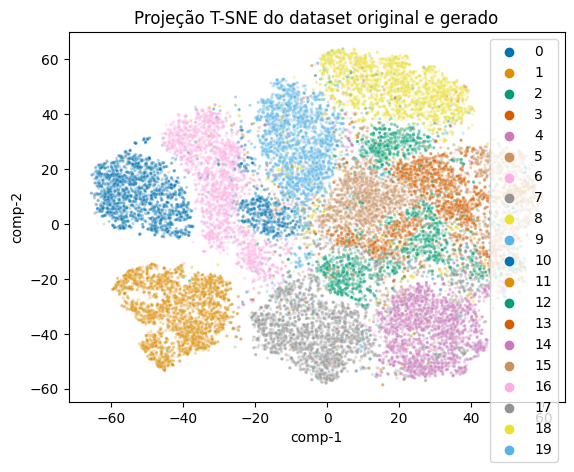

In [39]:
df = pd.DataFrame()
df["y"] = labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("colorblind", 2*nClasses),
                data=df,s=5,alpha=0.3).set(title="Projeção T-SNE do dataset original e gerado")

plt.savefig(verifiedFolder('inception+tsne/' + datasetName + '/' + generatorName + '/todos.png'))

In [40]:
for j in range(nClasses):
    tstZ = []
    tstLbl = []
    for i in range(len(labels)):
        if(labels[i]%10 == j):
            tstZ.append(z[i])
            tstLbl.append(labels[i])
    tstZ = np.array(tstZ)
    tstLbl = np.array(tstLbl)

    df2 = pd.DataFrame()
    df2["y"] = tstLbl
    df2["comp-1"] = tstZ[:,0]
    df2["comp-2"] = tstZ[:,1]
    sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(),
                    palette=sns.color_palette("colorblind", 2),
                    data=df2,s=5,alpha=0.3).set(title="Projeção T-SNE do dataset original e gerado classe " + str(j))

    plt.savefig(verifiedFolder('inception+tsne/' + datasetName + '/' + generatorName + '/classe_' + str(j) + '.png'))

    plt.clf()

<Figure size 640x480 with 0 Axes>